In [2]:
import numpy as np
import matplotlib.pyplot as plt
from anyio import sleep

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def sigmoid_derivative(x):
    return x*(1-x)

In [12]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.random.rand(1, output_size)
        self.learning_rate = learning_rate
        self.errors = []

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)

        return self.output

    def backward(self, X, y):
        # Error di output
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        # Error di lapisan tersembunyi
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update bobot dan bias
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

        # Menyimpan error total dari epoch saat ini (Mean Squared Error)
        self.errors.append(np.mean(np.square(output_error)))

    # Training
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)

    # Prediksi
    def predict(self, X):
        output = self.forward(X)
        return np.round(output)  # Membulatkan hasil untuk klasifikasi biner

    # Visualisasi error selama training
    def plot_error(self):
        plt.plot(self.errors)
        plt.xlabel("Epoch")
        plt.ylabel("Mean Squared Error")
        plt.title("Error Selama Training")
        plt.show()

In [13]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

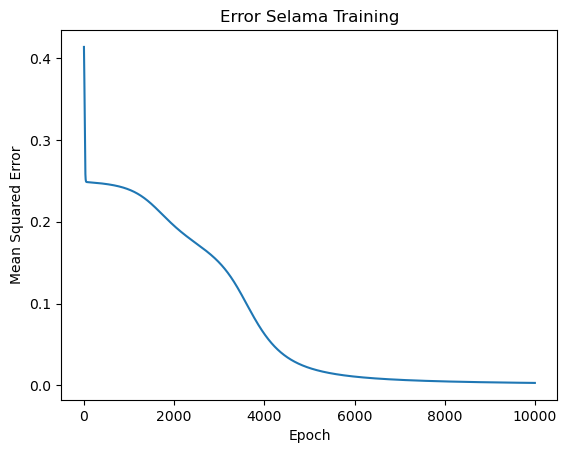

In [14]:
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
nn.train(X, y, epochs=10000)
nn.plot_error()

In [15]:
for i in X:
    print(f"Input: {i}, Predicted Output: {nn.predict(i.reshape(1, -1))}")

Input: [0 0], Predicted Output: [[0.]]
Input: [0 1], Predicted Output: [[1.]]
Input: [1 0], Predicted Output: [[1.]]
Input: [1 1], Predicted Output: [[0.]]


array([[1.]])